In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/spambase_csv.csv")
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

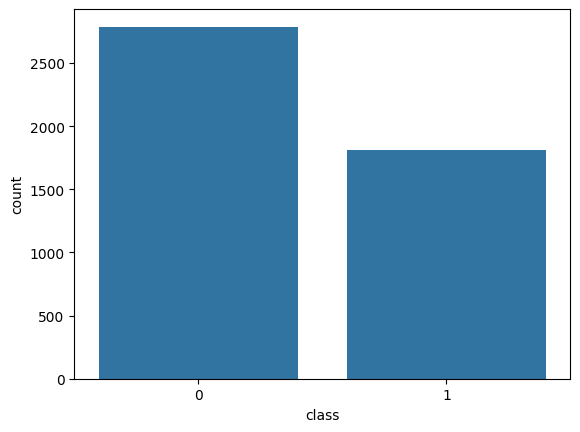

In [ ]:
sns.countplot(x='class', data=dataset)
plt.show()

In [ ]:
X = dataset.drop('class', axis=1)
y = dataset['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.show()

Accuracy: 0.9294245385450597
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



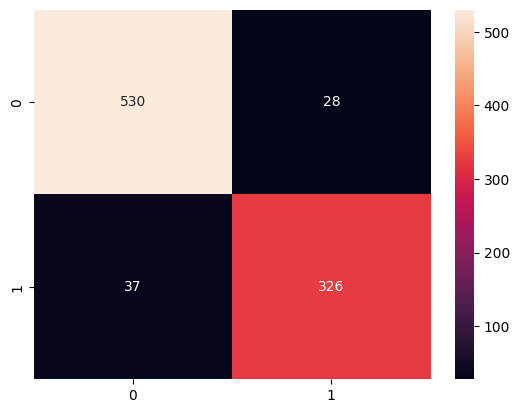

In [ ]:
evaluate(lr, X_test_scaled, y_test)

# Training and Evaluation of Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9446254071661238
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       558
           1       0.95      0.91      0.93       363

    accuracy                           0.94       921
   macro avg       0.95      0.94      0.94       921
weighted avg       0.94      0.94      0.94       921



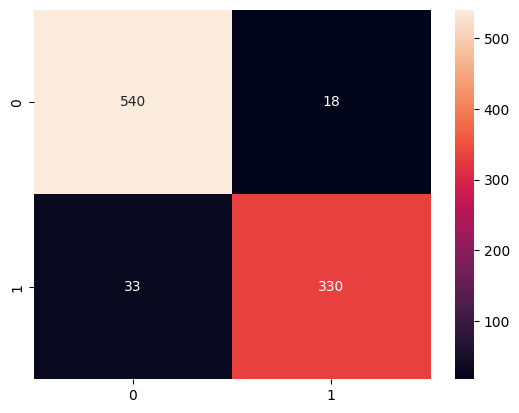

In [ ]:
evaluate(rf_classifier, X_test_scaled, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluation of Decision Tree Classifier

Accuracy: 0.9109663409337676
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       558
           1       0.88      0.89      0.89       363

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921



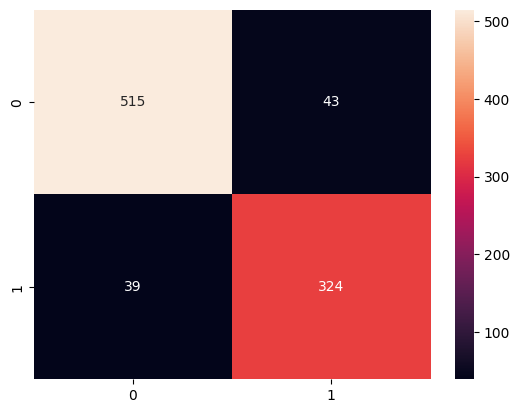

In [ ]:
evaluate(dt_classifier, X_test_scaled, y_test)

### Decision Tree Visualization (a small portion)

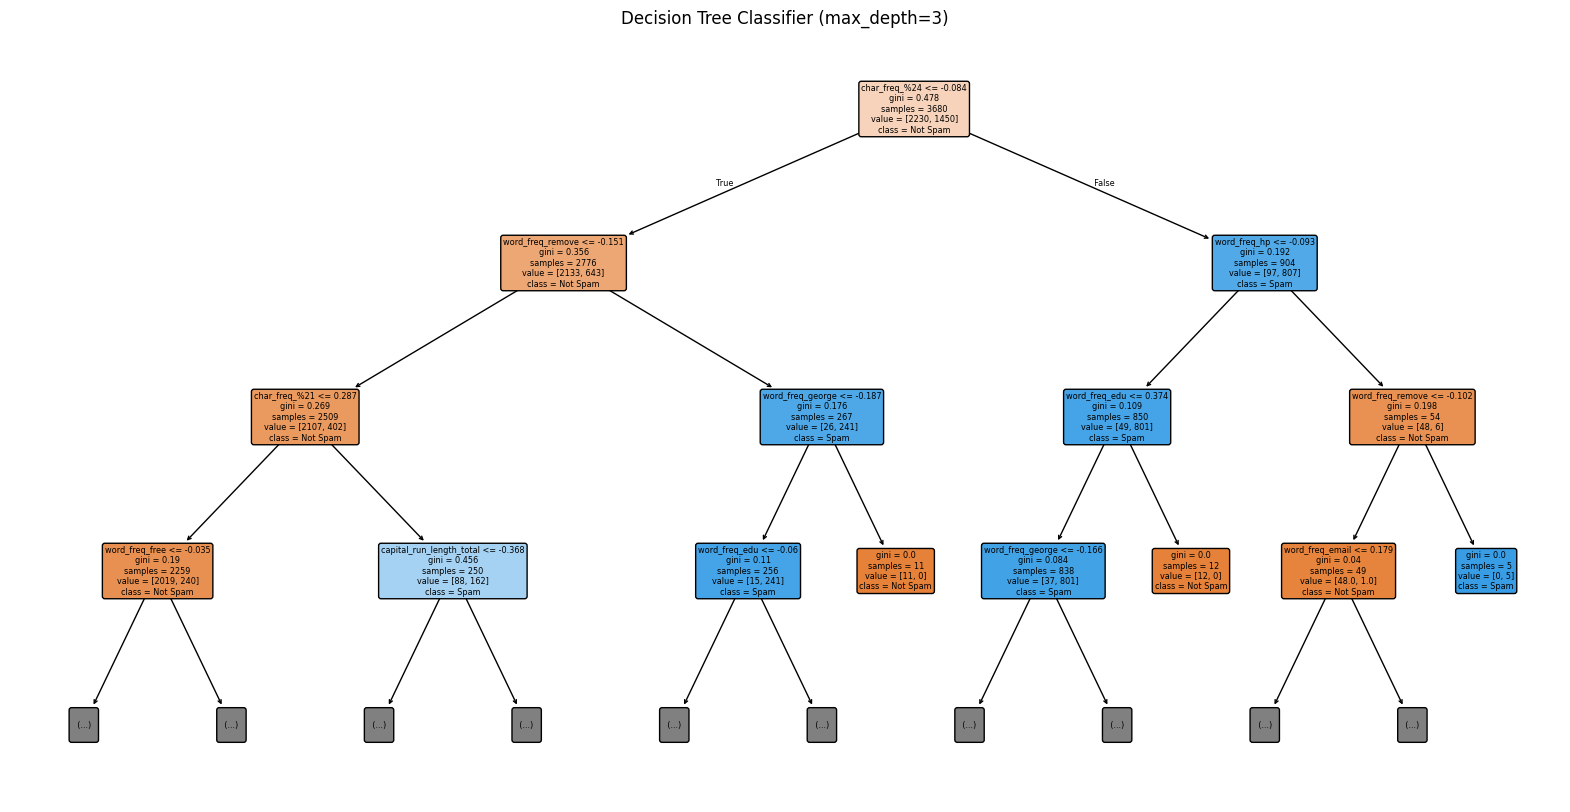

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, max_depth=3, feature_names=X.columns, class_names=['Not Spam', 'Spam'], filled=True, rounded=True)
plt.title("Decision Tree Classifier (max_depth=3)")
plt.show()